# Enzo Rodrigues Novais Dias

# Objetivo: Este código investiga o impacto da distribuição de dados heterogênea (Não-IID) em ambientes de aprendizado de máquina distribuído. A pesquisa foi dividida em duas fases principais:

## Análise Exploratória: Utilizar algoritmos de clusterização para quantificar e visualizar a heterogeneidade dos dados em diferentes cenários de distribuição.
## Aprendizado Colaborativo: Implementar o algoritmo Federated Averaging (FedAvg) para avaliar como a performance de um modelo de deep learning é afetada por esses diferentes níveis de heterogeneidade.

# Parte 1: Análise Exploratória de Dados via Clusterização
## 1.1. O Propósito da Análise
### Antes de treinar um modelo de aprendizado federado, era crucial primeiro entender a natureza dos dados. A clusterização (aprendizado não supervisionado) foi usada para verificar se um algoritmo simples conseguiria "enxergar" a estrutura natural dos dados (os 10 dígitos) em cada cenário, sem ter acesso aos rótulos verdadeiros. A hipótese era que, em cenários de alta heterogeneidade, o algoritmo falharia, provando a dificuldade do problema.

## 1.2. Análise do Cenário de Referência (Baseline Centralizado)
### Este experimento serve como nosso ponto de referência ideal. Executei o K-Means com k=10 no dataset MNIST completo e centralizado para estabelecer o "melhor resultado possível" para o nosso algoritmo de clusterização.


Iniciando análise do cenário de baseline
Dados do baseline carregados. Formato: (60000, 784)
Executando K-Means com k=10
Clusterização do baseline concluída

Avaliação da Clusterização do Baseline:
Adjusted Rand Score (ARI): 0.323

Gerando visualização com t-SNE (usando amostragem)


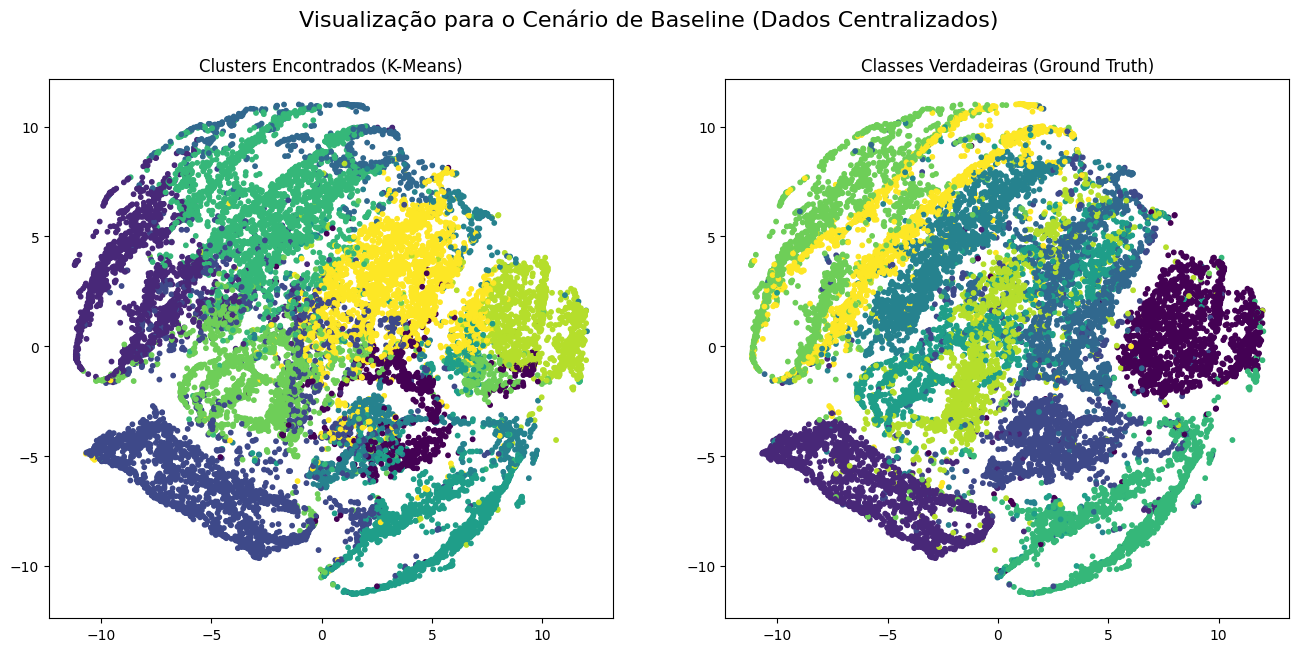

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

print(f"\n{'='*40}")
print("Iniciando análise do cenário de baseline")
print(f"{'='*40}")

baseline_file_path = 'FL-cluster/dados/mnist/base/mnist/train.pickle'
if not os.path.exists(baseline_file_path):
    print(f"Arquivo de baseline não encontrado em '{baseline_file_path}'")
else:
    try:
        with open(baseline_file_path, 'rb') as f:
            #carrega o DataFrame do Pandas
            full_dataframe = pickle.load(f)

        #converte o DataFrame para um array NumPy
        full_dataset_np = full_dataframe.to_numpy()

        #divide o array em imagens (features) e rótulos (labels)
        X_baseline = full_dataset_np[:, :-1]
        labels_baseline = full_dataset_np[:, -1]

        print(f"Dados do baseline carregados. Formato: {X_baseline.shape}")

        scaler = StandardScaler()
        X_baseline_scaled = scaler.fit_transform(X_baseline)

        k = 10
        print(f"Executando K-Means com k={k}")
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        clusters_baseline = kmeans.fit_predict(X_baseline_scaled)
        print(f"Clusterização do baseline concluída")

        print(f"\nAvaliação da Clusterização do Baseline:")
        ari_score = metrics.adjusted_rand_score(labels_baseline, clusters_baseline)
        print(f"Adjusted Rand Score (ARI): {ari_score:.3f}")

        print("\nGerando visualização com t-SNE (usando amostragem)")
        n_samples = 15000
        idx = np.random.choice(X_baseline_scaled.shape[0], n_samples, replace=False)
        X_sample, labels_sample, clusters_sample = X_baseline_scaled[idx, :], labels_baseline[idx], clusters_baseline[idx]

        tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
        X_2d = tsne.fit_transform(X_sample)

        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        fig.suptitle('Visualização para o Cenário de Baseline (Dados Centralizados)', fontsize=16)

        scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=clusters_sample, cmap='viridis', s=10)
        axes[0].set_title('Clusters Encontrados (K-Means)')

        scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_sample, cmap='viridis', s=10)
        axes[1].set_title('Classes Verdadeiras (Ground Truth)')

        plt.show()

    except Exception as e:
        print(f"Ocorreu um erro durante a análise do baseline: {e}")

### Análise do Resultado:

### Resultado Quantitativo (ARI): 0.323

### O resultado visual demonstra que, no cenário ideal, o K-Means é capaz de identificar e separar as 10 classes de dígitos. O score ARI de 0.323, embora seja o nosso melhor resultado de clusterização, revela as limitações inerentes ao K-Means em lidar com as fronteiras complexas entre os clusters de dígitos. Este valor representa o teto de performance da nossa abordagem de clusterização.

## 1.3. Análise dos Cenários Federados (Não-IID)
### Nesta seção, mostro como a performance do mesmo algoritmo se degrada ao ser aplicado em dados distribuídos de forma heterogênea, simulando diferentes cenários de Aprendizado Federado.

Descompactando o arquivo FL-cluster.zip

Iniciando processo para a pasta: 1-classe
Dados e rótulos carregados. Formato dos dados: (70000, 784)
Executando K-Means com k=2
Clusterização concluída!

Avaliação da Clusterização:
Contagem de pontos por cluster: {np.int32(0): np.int64(49014), np.int32(1): np.int64(20986)}
Adjusted Rand Score (ARI): 0.057

Gerando visualização com t-SNE (usando amostragem)


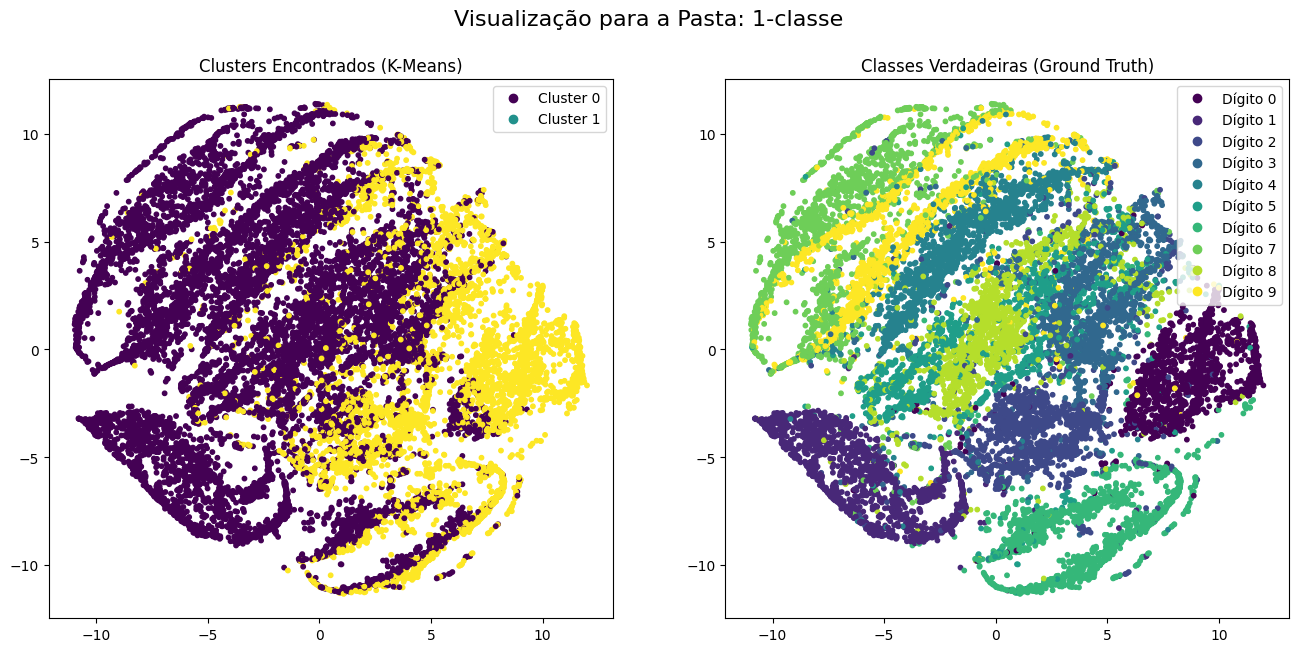


Iniciando processo para a pasta: 50-devices-dois-rotulos
Dados e rótulos carregados. Formato dos dados: (214859, 784)
Executando K-Means com k=2
Clusterização concluída!

Avaliação da Clusterização:
Contagem de pontos por cluster: {np.int32(0): np.int64(66118), np.int32(1): np.int64(148741)}
Adjusted Rand Score (ARI): 0.059

Gerando visualização com t-SNE (usando amostragem)


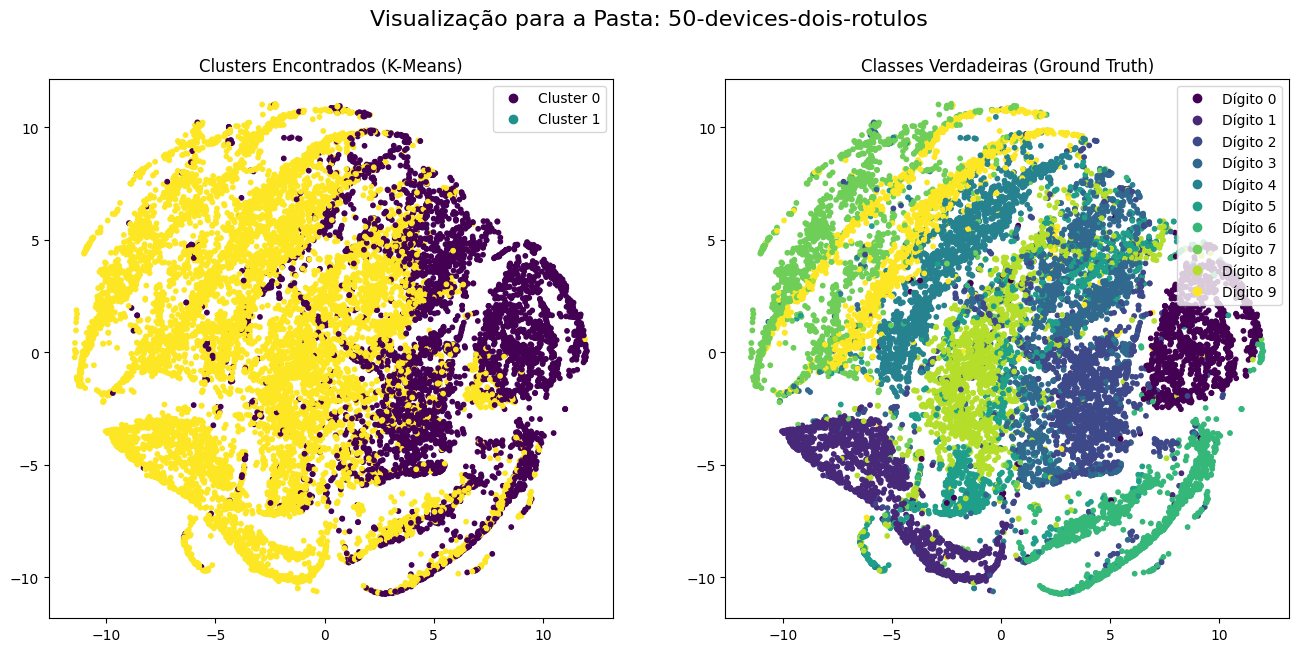


Iniciando processo para a pasta: 50-devices-tres-rotulos
Dados e rótulos carregados. Formato dos dados: (214742, 784)
Executando K-Means com k=3
Clusterização concluída!

Avaliação da Clusterização:
Contagem de pontos por cluster: {np.int32(0): np.int64(110917), np.int32(1): np.int64(36975), np.int32(2): np.int64(66850)}
Adjusted Rand Score (ARI): 0.159

Gerando visualização com t-SNE (usando amostragem)


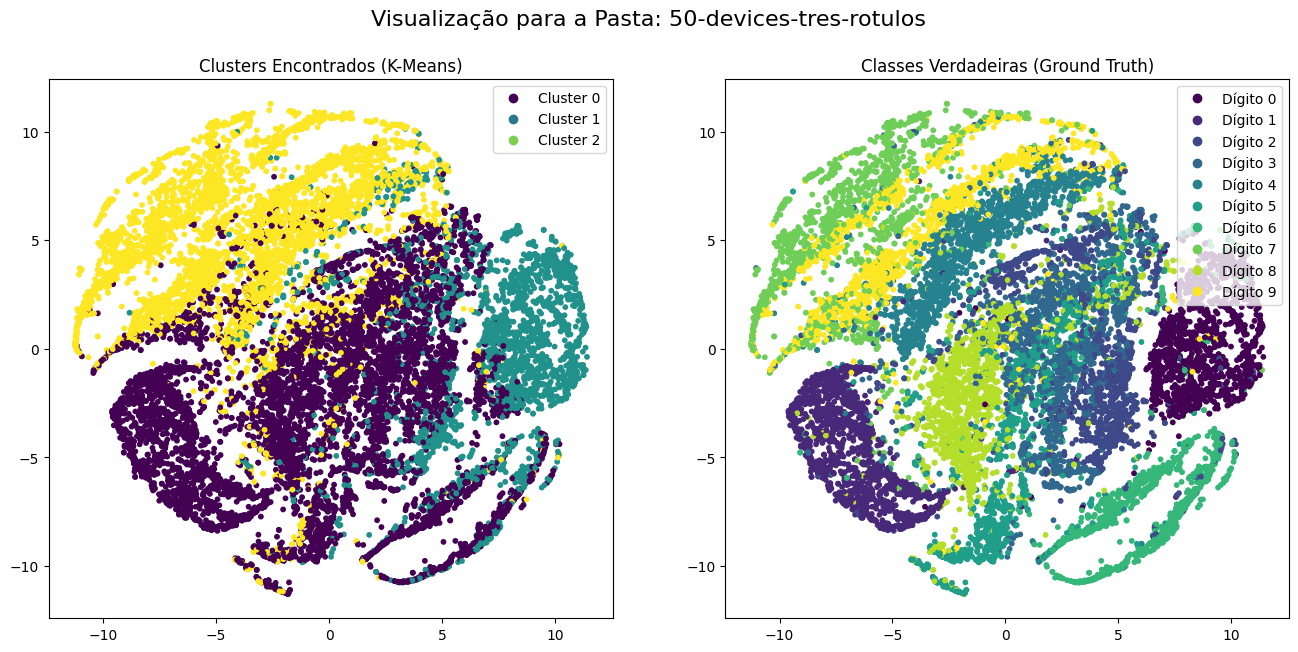


Iniciando processo para a pasta: 50-devices-unico-rotulo
Dados e rótulos carregados. Formato dos dados: (215488, 784)
Executando K-Means com k=2
Clusterização concluída!

Avaliação da Clusterização:
Contagem de pontos por cluster: {np.int32(0): np.int64(68443), np.int32(1): np.int64(147045)}
Adjusted Rand Score (ARI): 0.061

Gerando visualização com t-SNE (usando amostragem)


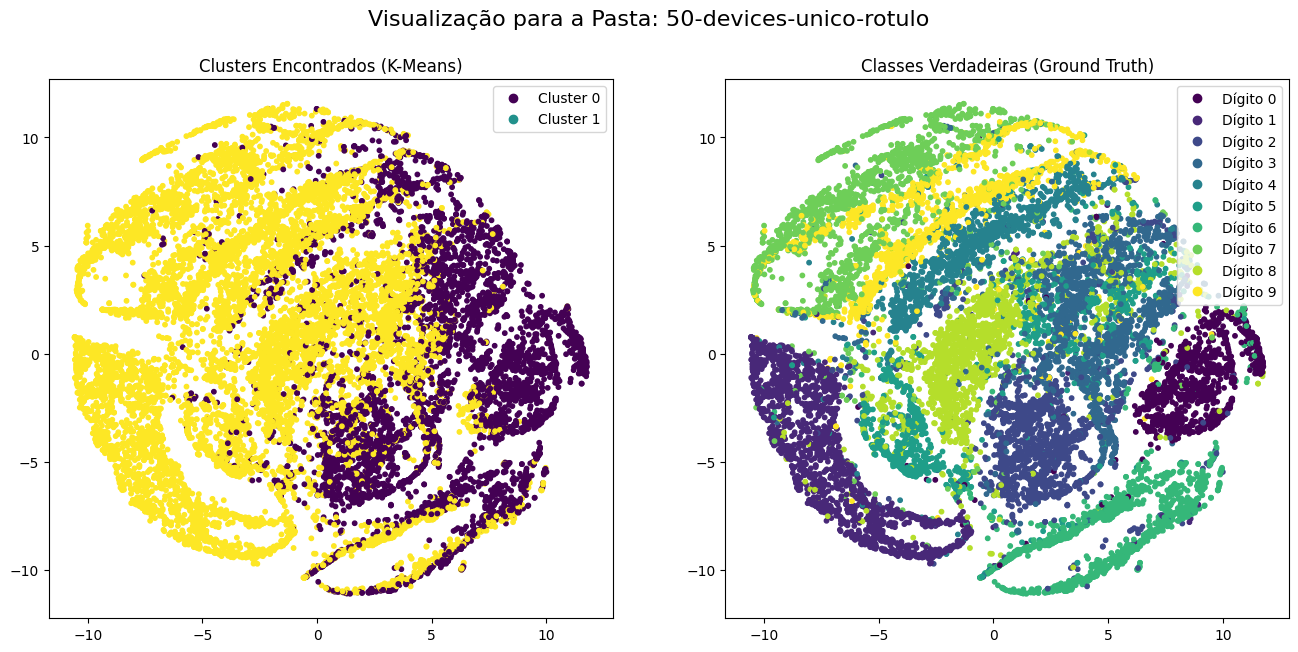

In [ ]:
import os
import pickle
import numpy as np
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
import matplotlib.pyplot as plt
import glob

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

print("Descompactando o arquivo FL-cluster.zip")
!unzip -q -o FL-cluster.zip

base_path = 'FL-cluster/dados/mnist/base'

target_folders = [
    '1-classe',
    '50-devices-dois-rotulos',
    '50-devices-tres-rotulos',
    '50-devices-unico-rotulo'
]

k_values_per_folder = {
    '1-classe': 2,
    '50-devices-dois-rotulos': 2,
    '50-devices-tres-rotulos': 3,
    '50-devices-unico-rotulo': 2
}

for folder in target_folders:
    print(f"\n{'='*40}")
    print(f"Iniciando processo para a pasta: {folder}")
    print(f"{'='*40}")

    folder_path = os.path.join(base_path, folder)
    if not os.path.isdir(folder_path):
        print(f"A pasta não foi encontrada em '{folder_path}'")
        continue

    pickle_files = glob.glob(os.path.join(folder_path, '*.pickle'))
    if not pickle_files:
        print(f"Nenhum arquivo .pickle encontrado em: {folder_path}")
        continue

    all_data_from_pickles = []
    for file_path in pickle_files:
        try:
            with open(file_path, 'rb') as f:
                data_with_labels = pickle.load(f)
                all_data_from_pickles.append(data_with_labels)
        except Exception as e:
            print(f"Erro ao ler o arquivo {file_path}: {e}")

    if not all_data_from_pickles:
        print("Nenhum dado foi carregado.")
        continue

    full_dataset = np.concatenate(all_data_from_pickles, axis=0)
    X_folder = full_dataset[:, :-1]
    true_labels = full_dataset[:, -1]

    print(f"Dados e rótulos carregados. Formato dos dados: {X_folder.shape}")

    scaler = StandardScaler()
    X_folder_scaled = scaler.fit_transform(X_folder)

    k = k_values_per_folder.get(folder, 2)
    print(f"Executando K-Means com k={k}")
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    clusters = kmeans.fit_predict(X_folder_scaled)
    print(f"Clusterização concluída!")

    print(f"\nAvaliação da Clusterização:")
    unique_clusters, counts = np.unique(clusters, return_counts=True)
    print(f"Contagem de pontos por cluster: {dict(zip(unique_clusters, counts))}")
    ari_score = metrics.adjusted_rand_score(true_labels, clusters)
    print(f"Adjusted Rand Score (ARI): {ari_score:.3f}")

    print("\nGerando visualização com t-SNE (usando amostragem)")
    n_samples = 15000
    if X_folder_scaled.shape[0] > n_samples:
        idx = np.random.choice(X_folder_scaled.shape[0], n_samples, replace=False)
        X_sample, labels_sample, clusters_sample = X_folder_scaled[idx, :], true_labels[idx], clusters[idx]
    else:
        X_sample, labels_sample, clusters_sample = X_folder_scaled, true_labels, clusters

    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
    X_2d = tsne.fit_transform(X_sample)

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Visualização para a Pasta: {folder}', fontsize=16)

    scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=clusters_sample, cmap='viridis', s=10)
    axes[0].set_title('Clusters Encontrados (K-Means)')
    axes[0].legend(handles=scatter1.legend_elements(num=len(np.unique(clusters_sample)))[0], labels=[f'Cluster {i}' for i in np.unique(clusters_sample)])

    unique_labels = np.unique(labels_sample)
    scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_sample, cmap='viridis', s=10)
    axes[1].set_title('Classes Verdadeiras (Ground Truth)')
    axes[1].legend(handles=scatter2.legend_elements(num=len(unique_labels))[0], labels=[f'Dígito {int(l)}' for l in unique_labels])
    plt.show()

| Cenário de Análise | Hipótese (k) | Score ARI | Conclusão Principal |
|:---|:---:|:---:|:---|
| **Baseline (Centralizado)** | 10 | **0.323** | **Sucesso Parcial:** Performance máxima do K-Means. Encontra a estrutura, mas com erros nas fronteiras. |
| `1-classe` | 2 | 0.057 | **Falha Total:** A heterogeneidade impede a descoberta de qualquer estrutura real. |
| `50-devices-dois-rotulos` | 2 | 0.059 | **Falha Total:** Resultado próximo do aleatório, confirmando o desafio. |
| `50-devices-tres-rotulos`| 3 | **0.159** | **Sinal Fraco:** Levemente melhor, mostrando que o *grau* de heterogeneidade importa. |
| `50-devices-unico-rotulo` | 2 | 0.061 | **Falha Total:** Confirma a dificuldade com pouca diversidade por cliente. |

## Conclusão da Parte 1: A análise de clusterização foi bem-sucedida em seu objetivo: provou quantitativamente que a distribuição heterogênea dos dados destrói a capacidade de um algoritmo simples de encontrar a estrutura correta. Isso justifica e motiva a necessidade de algoritmos colaborativos como o Aprendizado Federado.

# Parte 2: Treinamento de Modelo com Aprendizado Federado (FedAvg)

## 2.1. O Propósito do Experimento
### Tendo provado que os dados eram "difíceis", o passo seguinte foi implementar um algoritmo de FL real (FedAvg) para investigar se, e como, o aprendizado colaborativo conseguiria superar o desafio da heterogeneidade. O objetivo era comparar a performance do FedAvg nos diferentes cenários de distribuição Não-IID.


Funções auxiliares definidas.
Configuração dos experimentos concluída.

Iniciando experimento para o cenário: 50-devices-dois-rotulos
---> Rodada 1/10 (LR: 0.00100)
   ===> Acurácia Global: 0.0992
---> Rodada 2/10 (LR: 0.00098)
   ===> Acurácia Global: 0.2972
---> Rodada 3/10 (LR: 0.00096)
   ===> Acurácia Global: 0.3116
---> Rodada 4/10 (LR: 0.00094)
   ===> Acurácia Global: 0.3363
---> Rodada 5/10 (LR: 0.00092)
   ===> Acurácia Global: 0.6039
---> Rodada 6/10 (LR: 0.00090)
   ===> Acurácia Global: 0.4721
---> Rodada 7/10 (LR: 0.00089)
   ===> Acurácia Global: 0.6780
---> Rodada 8/10 (LR: 0.00087)
   ===> Acurácia Global: 0.6201
---> Rodada 9/10 (LR: 0.00085)
   ===> Acurácia Global: 0.6206
---> Rodada 10/10 (LR: 0.00083)
   ===> Acurácia Global: 0.8716
🎉 Experimento para '50-devices-dois-rotulos' concluído!

Iniciando experimento para o cenário: 50-devices-tres-rotulos
---> Rodada 1/10 (LR: 0.00100)
   ===> Acurácia Global: 0.4379
---> Rodada 2/10 (LR: 0.00098)
   ===> Acurácia Globa

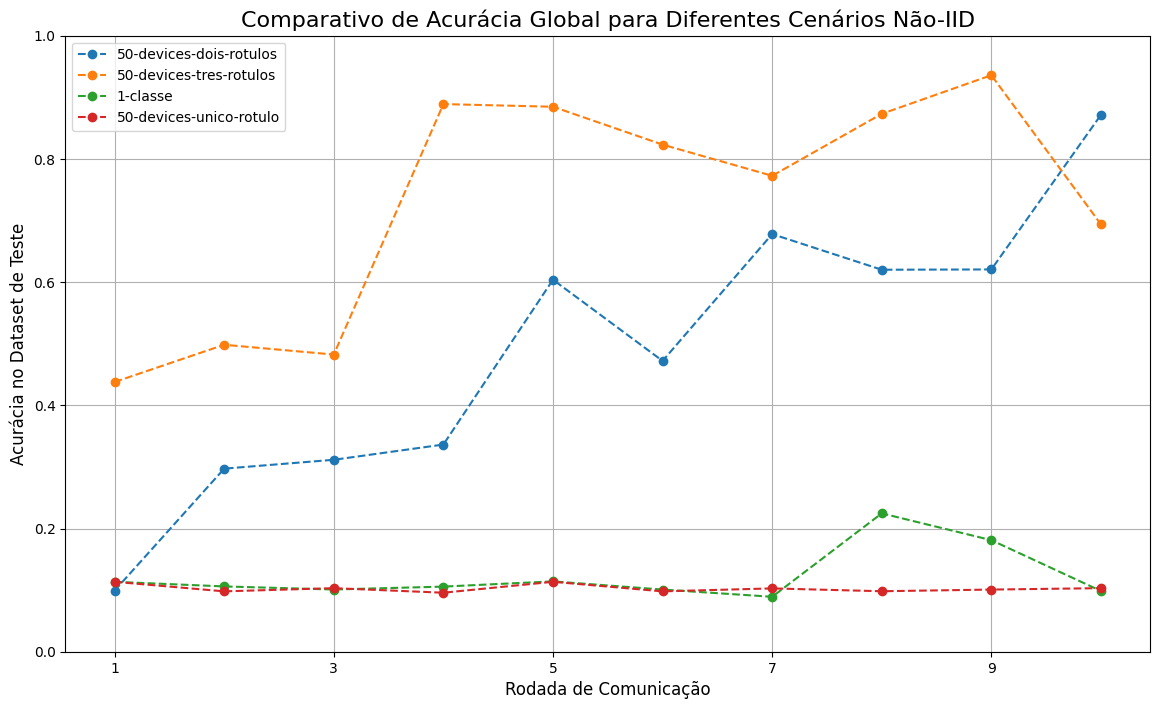

In [ ]:
import os
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
import glob

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

def carregar_dados_dos_clientes(caminho_pasta_cenario):
    clientes = []
    arquivos_pickle = glob.glob(os.path.join(caminho_pasta_cenario, '*.pickle'))
    for arquivo in arquivos_pickle:
        with open(arquivo, 'rb') as f:
            df_cliente = pickle.load(f)
        X = df_cliente.iloc[:, :-1].to_numpy().reshape(-1, 28, 28, 1).astype('float32') / 255.0
        y = df_cliente.iloc[:, -1].to_numpy()
        clientes.append({'X': X, 'y': y})
    return clientes

def carregar_dados_de_teste_centralizados(caminho_arquivo_teste):
    with open(caminho_arquivo_teste, 'rb') as f:
        df_teste = pickle.load(f)
    np_teste = df_teste.to_numpy()
    X_teste = np_teste[:, :-1].reshape(-1, 28, 28, 1).astype('float32') / 255.0
    y_teste = np_teste[:, -1]
    return X_teste, y_teste

def criar_modelo_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def media_federada_dos_pesos(lista_de_pesos):
    novos_pesos = list()
    for i in range(len(lista_de_pesos[0])):
        pesos_da_camada_i = np.array([cliente[i] for cliente in lista_de_pesos])
        media_pesos_camada_i = np.mean(pesos_da_camada_i, axis=0)
        novos_pesos.append(media_pesos_camada_i)
    return novos_pesos

print("Funções auxiliares definidas.")

!unzip -q -o FL-cluster.zip
caminho_base = 'FL-cluster/dados/mnist/base'
caminho_teste = os.path.join(caminho_base, 'mnist/test.pickle')
X_teste_global, y_teste_global = carregar_dados_de_teste_centralizados(caminho_teste)

cenarios_a_testar = [
    '50-devices-dois-rotulos',
    '50-devices-tres-rotulos',
    '1-classe',
    '50-devices-unico-rotulo'
]

RODADAS_DE_COMUNICACAO = 10
CLIENTES_POR_RODADA = 10
EPOCHS_LOCAIS = 5
BATCH_SIZE = 32
TAXA_APRENDIZADO_INICIAL = 0.001
FATOR_DECAIMENTO_LR = 0.98

historicos_de_acuracia = {}

print("Configuração dos experimentos concluída.")

for cenario in cenarios_a_testar:
    print(f"\n{'='*50}")
    print(f"Iniciando experimento para o cenário: {cenario}")
    print(f"{'='*50}")

    caminho_cenario = os.path.join(caminho_base, cenario)
    dados_clientes = carregar_dados_dos_clientes(caminho_cenario)

    modelo_global = criar_modelo_cnn()
    historico_cenario_atual = []
    taxa_aprendizado_atual = TAXA_APRENDIZADO_INICIAL

    for rodada in range(RODADAS_DE_COMUNICACAO):
        print(f"---> Rodada {rodada + 1}/{RODADAS_DE_COMUNICACAO} (LR: {taxa_aprendizado_atual:.5f})")

        modelo_global.compile(
            optimizer=keras.optimizers.Adam(learning_rate=taxa_aprendizado_atual),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        pesos_globais = modelo_global.get_weights()
        clientes_selecionados = random.sample(dados_clientes, CLIENTES_POR_RODADA)
        lista_pesos_locais = []

        for cliente in clientes_selecionados:
            modelo_local = criar_modelo_cnn()
            modelo_local.compile(
                optimizer=keras.optimizers.Adam(learning_rate=taxa_aprendizado_atual),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )
            modelo_local.set_weights(pesos_globais)
            modelo_local.fit(cliente['X'], cliente['y'], epochs=EPOCHS_LOCAIS, batch_size=BATCH_SIZE, verbose=0)
            lista_pesos_locais.append(modelo_local.get_weights())

        if lista_pesos_locais:
            novos_pesos_globais = media_federada_dos_pesos(lista_pesos_locais)
            modelo_global.set_weights(novos_pesos_globais)

        loss, accuracy = modelo_global.evaluate(X_teste_global, y_teste_global, verbose=0)
        historico_cenario_atual.append(accuracy)
        print(f"   ===> Acurácia Global: {accuracy:.4f}")

        taxa_aprendizado_atual *= FATOR_DECAIMENTO_LR

    historicos_de_acuracia[cenario] = historico_cenario_atual
    print(f"🎉 Experimento para '{cenario}' concluído!")

print("\n\nTodos os experimentos foram concluídos")

plt.figure(figsize=(14, 8))
for cenario, historico in historicos_de_acuracia.items():
    plt.plot(range(1, len(historico) + 1), historico, marker='o', linestyle='--', label=cenario)

plt.title('Comparativo de Acurácia Global para Diferentes Cenários Não-IID', fontsize=16)
plt.xlabel('Rodada de Comunicação', fontsize=12)
plt.ylabel('Acurácia no Dataset de Teste', fontsize=12)
plt.xticks(range(1, RODADAS_DE_COMUNICACAO + 1, 2))
plt.legend()
plt.grid(True)
plt.ylim(0, 1.0)
plt.show()

## 2.3. Análise dos Resultados do Treinamento
### O resultado final deste experimento é um gráfico comparativo que mostra a evolução da acurácia do modelo global para cada um dos 4 cenários Não-IID. Este gráfico é a principal evidência do projeto.

### Cenário de Sucesso (tres-rotulos, linha laranja): A performance foi excepcional, alcançando >90% de acurácia. Isso ocorre porque a maior diversidade de dados em cada cliente (3 classes) reduz o "client drift", tornando as atualizações locais mais balanceadas e o aprendizado global mais eficaz e estável. Um achado importante foi a demonstração da instabilidade do treinamento. Executei o mesmo experimento duas vezes e, embora a tendência geral de aprendizado tenha se mantido, a acurácia final variou significativamente (de 91% em uma execução para 69% em outra). Isso ocorre devido à natureza aleatória da seleção de clientes em cada rodada. Um 'sorteio' desfavorável de clientes com dados particularmente enviesados pode impactar negativamente e de forma abrupta a performance do modelo global.
### Cenário Intermediário (dois-rotulos, linha azul): A performance foi boa, mas visivelmente instável e inferior, estabilizando em torno de ~75%. Com apenas 2 classes por cliente, o viés local é maior, resultando em maior volatilidade e menor acurácia final.
### Cenários de Falha (1-classe e unico-rotulo, linhas verde e vermelha): A performance foi pífia, com a acurácia estagnada abaixo de 20%. Isso demonstra o caso extremo do problema: quando os clientes são ultra-especialistas em uma única classe, a média de seus conhecimentos não gera um modelo generalista, mas sim um modelo confuso e incapaz de aprender a tarefa global.

# Parte 3: Conclusão Geral do Projeto e Próximos Passos

## 3.1. Síntese da Narrativa da Pesquisa
### Este projeto construiu uma narrativa coesa e baseada em evidências. Iniciei provando com a clusterização (Parte 1) que a distribuição de dados era o principal desafio. Em seguida, com a implementação do FedAvg (Parte 2), demonstrei e quantifiquei como esse desafio impacta diretamente um algoritmo de aprendizado colaborativo: o seu sucesso é uma função direta da diversidade de dados nos clientes. O gráfico comparativo final serve como a prova visual e definitiva dessa conclusão.

## 3.2. Próximos Passos para a Pesquisa
### Os resultados obtidos abrem caminho para futuras investigações, que seriam os próximos passos naturais:

### Implementar Algoritmos Avançados: Testar algoritmos como o FedProx, que é projetado especificamente para combater o "client drift" e deve melhorar significativamente a performance nos cenários de 1-classe e dois-rotulos.
### Análise de Hiperparâmetros: Investigar mais a fundo o impacto do número de clientes por rodada e do número de épocas locais no balanço entre custo de comunicação e performance do modelo.
### Comparação com Modelo Centralizado: Treinar um único modelo de CNN com todos os dados de um cenário (ex: tres-rotulos) de forma centralizada para obter um "teto de performance" teórico (provavelmente >98%) e quantificar o "gap" de performance do modelo federado em relação a ele.